In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Selecting features and target
df = pd.read_csv(
    "../../data/processed/cleaned_data_deliveries.csv",
    low_memory=False
)
# X = df[['inning', 'batting_team', 'bowling_team', 'over', 'batter', 'bowler', 'venue']]
# y = df['total_runs'] 

In [4]:
df.drop(columns="Unnamed: 0",inplace=True)

In [5]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,KKR,RCB,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,KKR,runs,140.0,223.0,20.0,N,No Issues,Asad Rauf,RE Koertzen
1,335982,1,KKR,RCB,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,KKR,runs,140.0,223.0,20.0,N,No Issues,Asad Rauf,RE Koertzen
2,335982,1,KKR,RCB,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,KKR,runs,140.0,223.0,20.0,N,No Issues,Asad Rauf,RE Koertzen
3,335982,1,KKR,RCB,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,KKR,runs,140.0,223.0,20.0,N,No Issues,Asad Rauf,RE Koertzen
4,335982,1,KKR,RCB,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,KKR,runs,140.0,223.0,20.0,N,No Issues,Asad Rauf,RE Koertzen


In [6]:
for i in ["batting_team",'bowling_team','venue']:
    df[i] =df[i].astype("category")
    df[i] =df[i].cat.codes

In [7]:
X = df[['inning', 'batting_team', 'bowling_team', 'over','venue']]
y = df['total_runs'] 

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=43)

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
c = lr.intercept_
c

1.1334616815952216

In [12]:
m = lr.coef_
m

array([-0.00581389,  0.00069279,  0.00110922,  0.0227399 , -0.00055003])

In [13]:
y_pred_train = lr.predict(X_train)

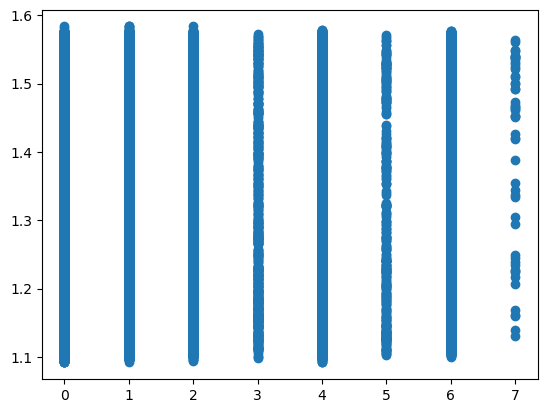

In [14]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.show()

In [15]:
y_pred_train

array([1.46701321, 1.15972554, 1.37637663, ..., 1.3469247 , 1.17566137,
       1.43465626])

In [16]:
r2_score(y_train,y_pred_train)

0.006414478653975819

In [17]:
df1 = pd.read_csv(
    "../../data/processed/cleaned_data_deliveries.csv",
    low_memory=False
)

In [18]:
df2 = pd.read_csv(
    "../../data/processed/clean_data.csv",
    low_memory=False
)

In [19]:
df1.columns

Index(['Unnamed: 0', 'match_id', 'inning', 'batting_team', 'bowling_team',
       'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs',
       'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder', 'season', 'date',
       'match_type', 'player_of_match', 'venue', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'target_runs',
       'target_overs', 'super_over', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [20]:
df2.columns

Index(['Unnamed: 0', 'id', 'season', 'city', 'date', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')

In [21]:
df2["target_runs"]

0       223.0
1       241.0
2       130.0
3       166.0
4       111.0
        ...  
1090    215.0
1091    160.0
1092    173.0
1093    176.0
1094    114.0
Name: target_runs, Length: 1095, dtype: float64

In [22]:
categorical_columns = ['season', 'city', 'venue', 'team1', 'team2', 'toss_winner', 'winner']

# One-hot encoding
df_encoded = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)

In [23]:
game_data  =df_encoded

In [28]:
# game_data.drop(columns="Unnamed: 0",inplace=True)
a = game_data.columns 

In [37]:
# X = game_data[['season', 'city', 'venue', 'team1', 'team2', 'toss_winner', 'winner']]
y = game_data['target_runs'] 

In [45]:
X=game_data.drop(columns=['id', 'date', 'player_of_match', 'toss_decision', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'umpire1'
,'umpire2','target_runs'])

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=43)

In [47]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
m = lr.coef_
m

array([-6.86771668e+00, -2.44904787e+00,  2.43467568e-01,  6.65898423e+00,
        3.62734027e+00,  1.59639247e+01,  6.30058887e+00,  1.43924644e+01,
        8.34356351e+00,  2.40453880e+01,  3.25274814e+01,  5.61305871e+01,
        8.60210438e+13,  8.60210438e+13,  8.60210438e+13,  8.60210438e+13,
        6.70861602e+14,  1.01001626e+15, -3.50508018e+13,  5.99825936e+14,
       -1.59015723e+14,  6.16927490e+14,  6.44507162e+14,  6.68774304e+14,
        6.18102333e+14,  6.26404871e+14,  3.39988894e+14,  2.59856308e+14,
       -4.00763463e+14,  3.81432911e+14,  3.42272495e+14,  5.08020392e+14,
       -1.29372720e+14,  2.20056334e+15,  4.48536393e+14,  7.33244664e+13,
       -8.62550970e+14, -1.65197361e+13,  1.75710223e+15,  4.48444696e+14,
        6.86852793e+13,  3.66238344e+14,  3.86001325e+14,  3.66238344e+14,
        8.01841353e+14,  8.82421015e+14, -9.12355051e+13,  5.41088347e+14,
        6.30604644e+14,  2.59856308e+14,  3.45877352e+14,  7.04585956e+14,
       -8.60210438e+13,  

In [54]:
c = lr.intercept_
c

-626404870822844.5

In [55]:
y_pred_train = lr.predict(X_train)

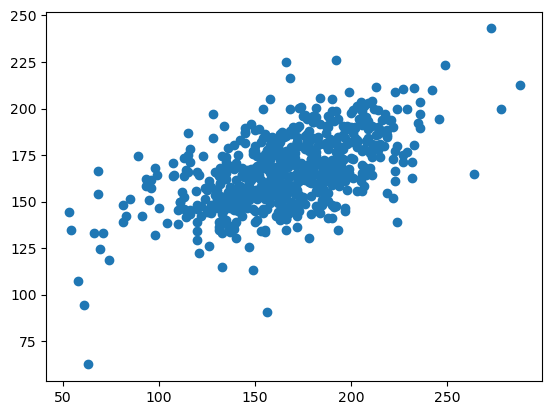

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    The linewidth 

In [65]:
import matplotlib.pyplot as plt
plt.scatter?
plt.scatter(y_train,y_pred_train)
plt.show()

In [57]:
r2_score(y_train,y_pred_train)

0.3115781699307232

In [58]:
y_pred_train

array([167.5  , 198.75 , 146.   , 178.75 , 168.75 , 211.25 , 157.25 ,
       151.375, 166.375, 152.5  , 154.625, 166.5  , 180.   , 135.   ,
       168.875, 148.375, 139.625, 161.5  , 163.   , 135.   , 143.125,
       177.5  , 209.875, 147.375, 145.   , 155.875, 157.5  , 156.25 ,
       164.25 , 163.5  , 138.875, 144.375, 172.25 , 162.625, 203.625,
       153.   , 166.5  , 153.25 , 159.375, 145.125, 129.625, 172.875,
       169.75 , 194.25 , 161.125, 170.625, 151.   , 179.25 , 155.   ,
       187.75 , 165.875, 170.5  , 184.75 , 154.5  , 177.125, 137.25 ,
       163.75 , 156.5  , 168.25 , 168.25 , 172.   , 210.75 , 168.   ,
       154.   , 107.375, 201.5  , 167.   , 124.375, 177.5  , 171.5  ,
       196.75 , 168.125, 157.125, 195.75 , 178.5  , 149.75 , 135.   ,
       144.75 , 184.25 , 157.75 , 179.5  , 159.25 , 173.75 , 165.375,
       184.875, 146.875, 153.25 , 182.875, 175.625, 177.875, 165.25 ,
       171.5  , 165.375, 167.625, 205.75 , 185.375, 193.25 , 184.25 ,
       132.   , 154.